In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading the dataset

In [92]:
train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# **Exploratory Data Analysis**
## General Dataset Overview

In [93]:
print(f"Shape = {train.shape}")

Shape = (39211, 16)


In [94]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

## Checking Null values

In [96]:
null_summary = train.isna().sum().to_frame(name='Null Count')
null_summary['Null Percentage (%)'] = (train.isna().sum() / len(train)) * 100
print(null_summary)

                   Null Count  Null Percentage (%)
last contact date           0             0.000000
age                         0             0.000000
job                       229             0.584020
marital                     0             0.000000
education                1467             3.741297
default                     0             0.000000
balance                     0             0.000000
housing                     0             0.000000
loan                        0             0.000000
contact                 10336            26.359950
duration                    0             0.000000
campaign                    0             0.000000
pdays                       0             0.000000
previous                    0             0.000000
poutcome                29451            75.109026
target                      0             0.000000


### Insights
* No Missing Values: `last contact date`, `age`, `marital`, `default`, `balance`, `housing`, `loan`, `duration`, `campaign`, `pdays`, `previous`, `target`.
* Low Missing Values: `job` (0.58%), `education` (3.74%).
* High Missing Values: `contact` (26.36%), `poutcome` (75.11%).
* Action needed: Impute or drop columns with high missing values based on importance.

## Checking Unique Values

In [97]:
unique_summary = train.nunique().to_frame(name='Unique Count')
unique_summary['Unique Percentage (%)'] = (train.nunique() / len(train)) * 100
print(unique_summary)

                   Unique Count  Unique Percentage (%)
last contact date          1013               2.583459
age                          78               0.198924
job                          11               0.028053
marital                       3               0.007651
education                     3               0.007651
default                       2               0.005101
balance                    9535              24.317156
housing                       2               0.005101
loan                          2               0.005101
contact                       2               0.005101
duration                   3146               8.023259
campaign                     63               0.160669
pdays                       865               2.206014
previous                    276               0.703884
poutcome                      3               0.007651
target                        2               0.005101


### Insights
* High Uniqueness: `balance` (24.32%), `duration` (8.02%), `last contact date` (2.58%), `pdays` (2.21%).
* Moderate Uniqueness: `age` (0.20%), `previous` (0.70%), `campaign` (0.16%).
* Low Uniqueness: Categorical variables like `job` (11), `marital` (3), `education` (3), `default` (2), `housing` (2), `loan` (2), `contact` (2), `poutcome` (3), and `target` (2).

## Numerical columns and Statistics

In [98]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


### Insights


* Age: Clients range from 18 to 95 years, with a median age of 40.
* Balance: Bank balances vary widely (-8019 to 102,127), indicating potential debt or high savings, with a median of 549.
* Duration: Call durations are heavily skewed, ranging from 0 to 4918 seconds, with a median of 197 seconds.
* Campaign: Most clients received few campaign contacts (median: 2), but some were contacted as many as 63 times.
* Pdays: Many clients were not previously contacted (-1 indicates no contact), but for those contacted, delays range from 0 to 871 days.
* Previous: Previous contact attempts are low for most clients (median: 0), though some were contacted up to 275 times.


## Distribution of categorical features

In [99]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','poutcome','target']
for i in categorical_columns:
    print(train[i].value_counts()/len(train)*100)
    print()

job
blue-collar      19.831170
management       19.030374
technician       15.500752
admin.           10.497054
services          8.479763
self-employed     4.748667
retired           4.651756
entrepreneur      4.603300
unemployed        4.297264
housemaid         4.223305
student           3.552575
Name: count, dtype: float64

marital
married     57.868965
single      28.690929
divorced    13.440106
Name: count, dtype: float64

education
secondary    49.945168
tertiary     29.621790
primary      16.691745
Name: count, dtype: float64

default
no     94.243962
yes     5.756038
Name: count, dtype: float64

housing
yes    55.23195
no     44.76805
Name: count, dtype: float64

loan
no     81.150698
yes    18.849302
Name: count, dtype: float64

contact
cellular     63.834128
telephone     9.805922
Name: count, dtype: float64

poutcome
failure    12.621458
other       6.528780
success     5.740736
Name: count, dtype: float64

target
no     85.139374
yes    14.860626
Name: count, dtype: float6

### Insights from Value Counts of Categorical Columns

1. **Job**: The majority of clients are employed in blue-collar (19.83%) and management (19.03%) roles, followed by technicians (15.50%). Other jobs like retired and self-employed have smaller representations.

2. **Marital Status**: Most clients are married (57.87%), followed by single clients (28.69%). Divorced clients make up a smaller proportion (13.44%).

3. **Education**: Secondary education is the most common (49.95%), followed by tertiary (29.62%) and primary education (16.69%).

4. **Default**: A vast majority of clients (94.24%) have no credit default, while only a small fraction (5.76%) reported a default.

5. **Housing**: The majority of clients (55.23%) own a house, whereas 44.77% do not.

6. **Loan**: Most clients (81.15%) do not have a loan, with only 18.85% holding a loan.

7. **Contact**: Most clients were contacted via cellular (63.83%), while only a small fraction were contacted by telephone (9.81%).

8. **Previous Outcome**: The most common outcome of previous campaigns is 'failure' (12.62%), followed by 'other' (6.53%) and 'success' (5.74%).

9. **Target (Subscription to Term Deposit)**: The target variable is highly imbalanced, with 85.14% of clients not subscribing to the term deposit ('no') and only 14.86% subscribing ('yes').


## Target Variable Analysis

target
no     33384
yes     5827
Name: count, dtype: int64


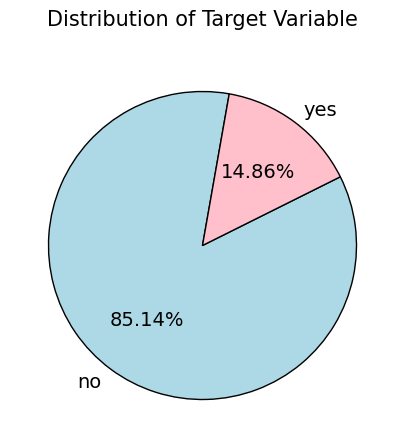

In [100]:
target_counts = train['target'].value_counts()
print(target_counts)

plt.figure(figsize=(5, 5))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.2f%%', startangle=80, colors=['lightblue', 'pink'], wedgeprops={'edgecolor': 'black'},textprops={'fontsize': 14})

plt.title('Distribution of Target Variable', fontsize=15, pad=20)
plt.show()

The dataset is highly imbalanced, with **85.14%** of the target variable being 'no' (no subscription) and only **14.86%** being 'yes' (subscription)

## Pie Chart for Distribution of Categorical Features

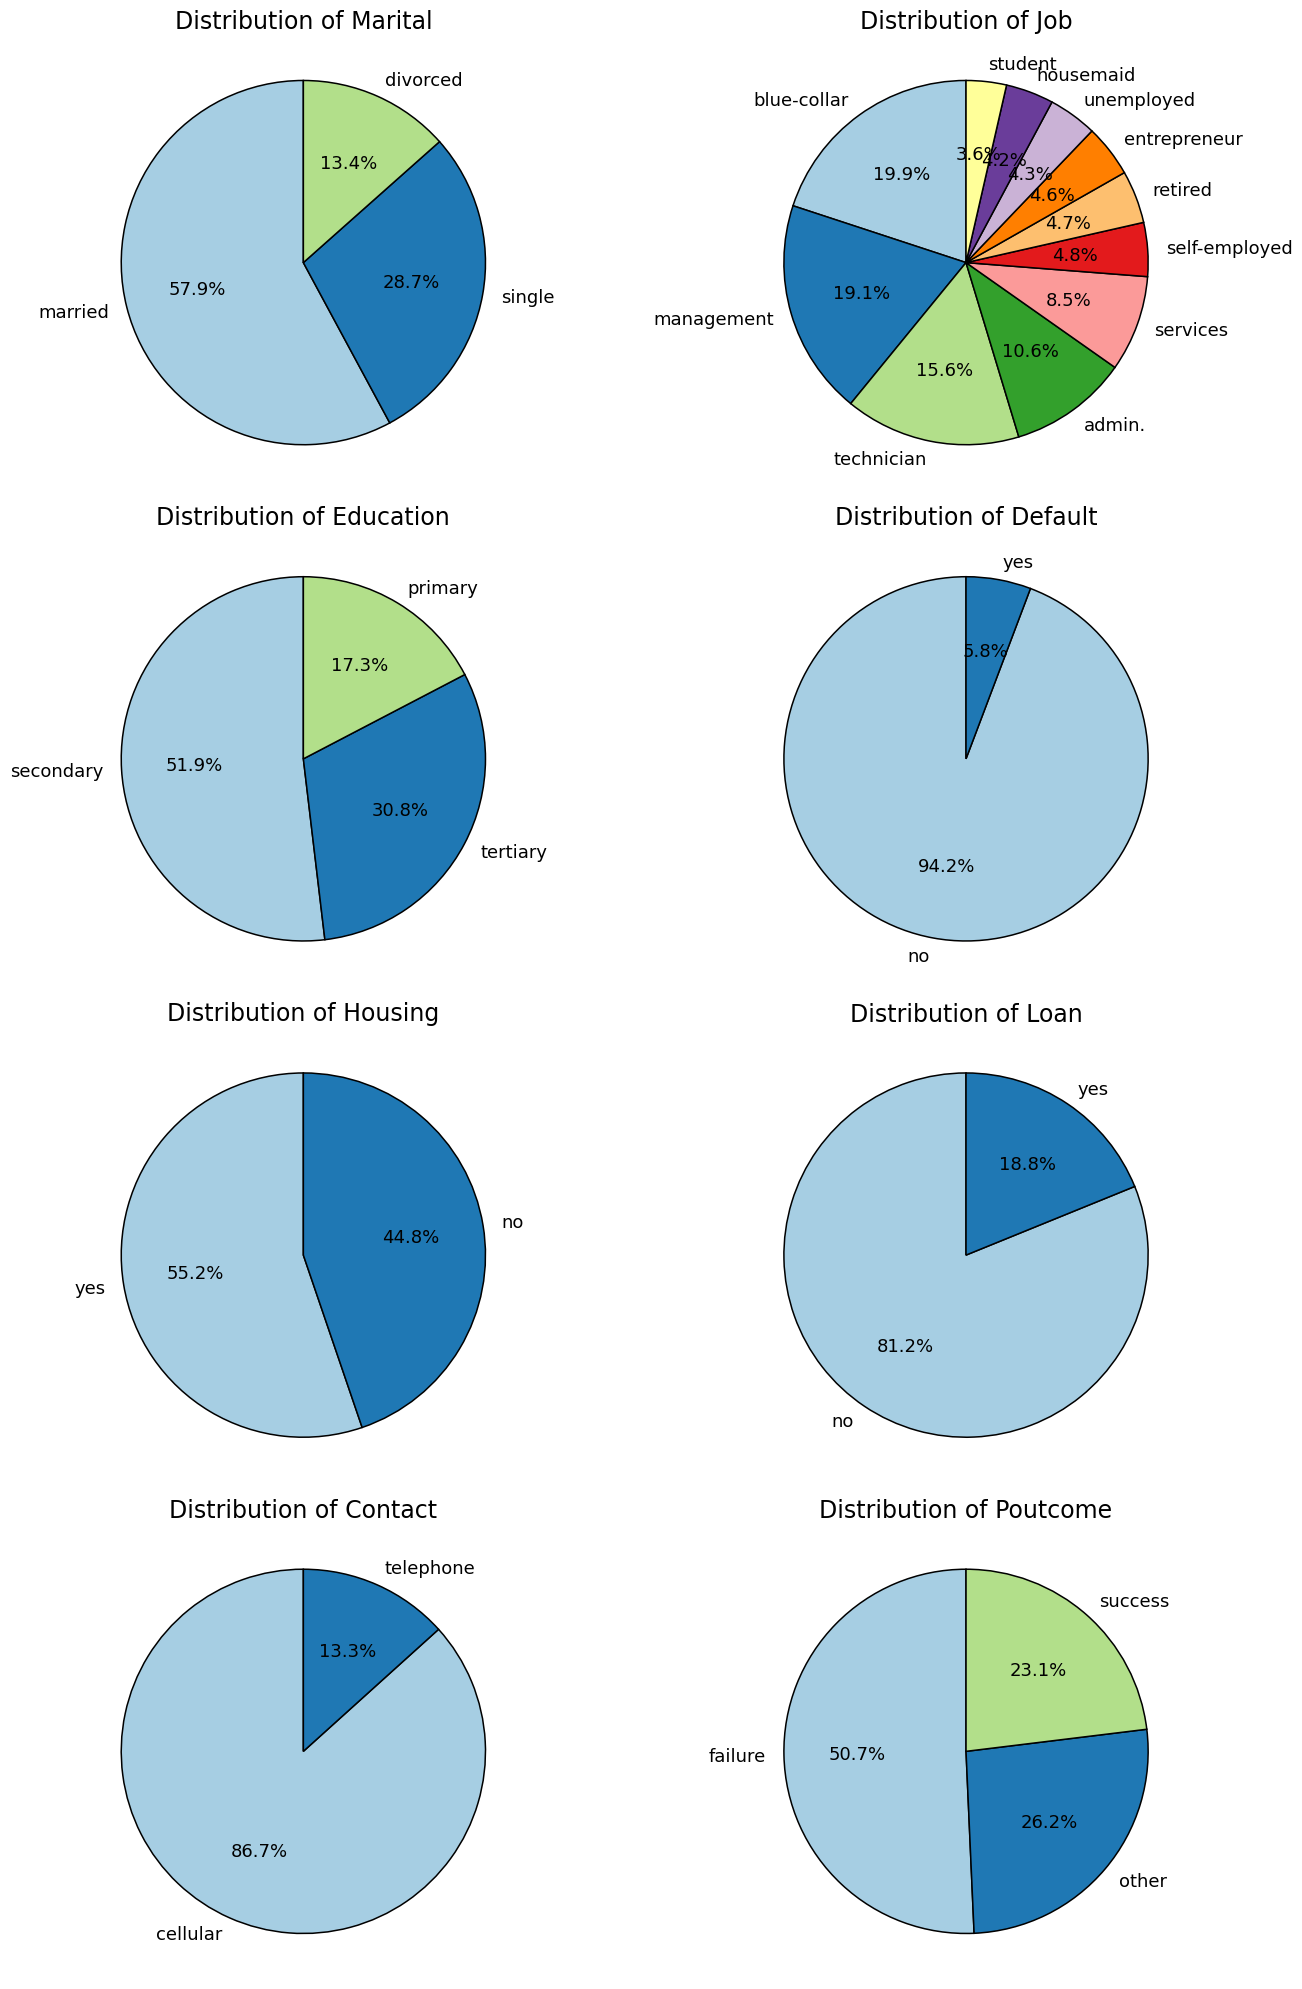

In [101]:
categorical_columns = ['marital', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

for i, col in enumerate(categorical_columns):
    row, col_num = divmod(i, 2)
    counts = train[col].value_counts()
    
    wedges, texts, autotexts = axes[row, col_num].pie(
        counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.1}
    )
    
    for text in texts + autotexts:
        text.set_fontsize(13)
    axes[row, col_num].set_title(f'Distribution of {col.capitalize()}', fontsize=17, pad=5)

plt.tight_layout()
plt.show()

## KDE Plots for Distribution Analysis of Numerical Features by Subscription Status

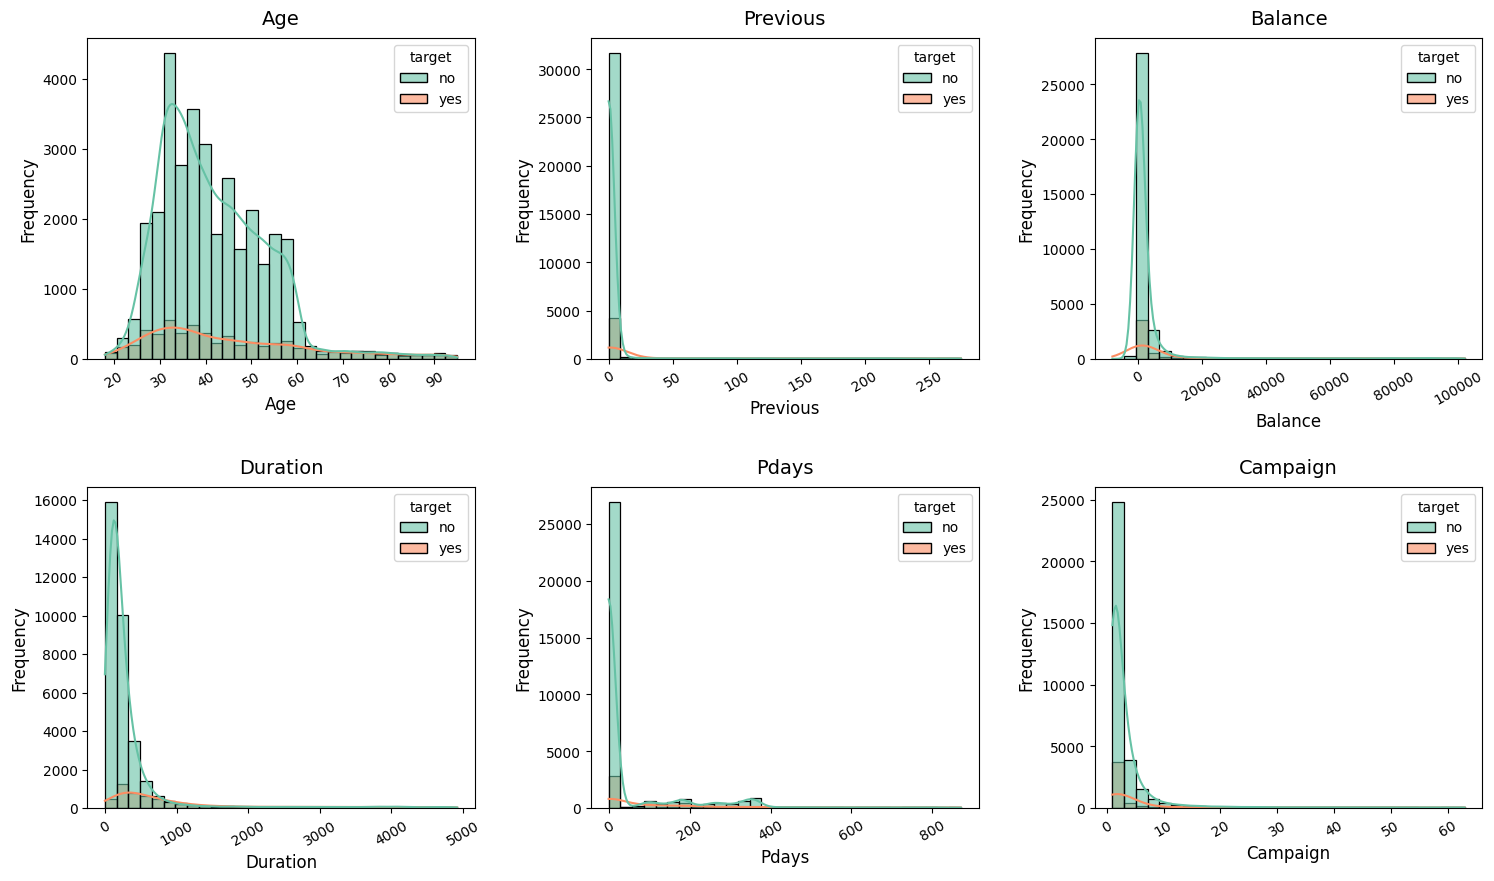

In [102]:
columns = ['age', 'previous', 'balance', 'duration', 'pdays', 'campaign']
titles = ['Age', 'Previous', 'Balance', 'Duration', 'Pdays', 'Campaign']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (col, title) in enumerate(zip(columns, titles)):
    r, c = divmod(i, 3) 
    sns.histplot(
        data=train, x=col, ax=axes[r, c], bins=30, kde=True, hue='target',
        palette='Set2', edgecolor='black', alpha=0.6
    )
    axes[r, c].set_title(title, fontsize=14, pad=10)
    axes[r, c].set_xlabel(title, fontsize=12)
    axes[r, c].set_ylabel('Frequency', fontsize=12)
    axes[r, c].tick_params(axis='x', rotation=30) 

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

### Insights


* **Age**
  The age distribution is approximately right-skewed with a concentration of clients in the 30–40 age range.   Insight: Focused campaigns targeting clients in the 30–40 range could be effective, as they form the bulk of the bank's clients.
  
* **Previous (Number of Previous Contacts):** Most clients had 0 previous contacts, indicated by a sharp peak near zero.
  Insight: The majority of clients are being contacted for the first time, suggesting a need to optimize first-call strategies.
  
* **Balance:**
The balance distribution is heavily right-skewed, with most clients having a low or zero balance. Insight: High-balance clients might require different marketing strategies. Additionally, understanding why most clients have low balances might uncover opportunities for growth.

* **Duration (Call Duration):**
Call durations are also right-skewed, with most calls being short (<300 seconds).
Insight: Long calls might correlate with higher subscription rates, so agents should prioritize client engagement.

* **Pdays (Days Since Last Contact):**
Most clients have not been contacted before, as shown by a large spike at pdays = -1.
Insight: Fresh leads dominate the dataset, and recontacting strategies might be limited.

* **Campaign (Number of Contacts in Current Campaign):**
The campaign variable shows a steep decline after 1–2 contacts, indicating most clients are contacted fewer times.
Insight: Excessive contact attempts may have diminishing returns; the bank should analyze the effectiveness of repeated contacts.




## Box Plots for Outlier Detection and Target Analysis in Numerical Columns

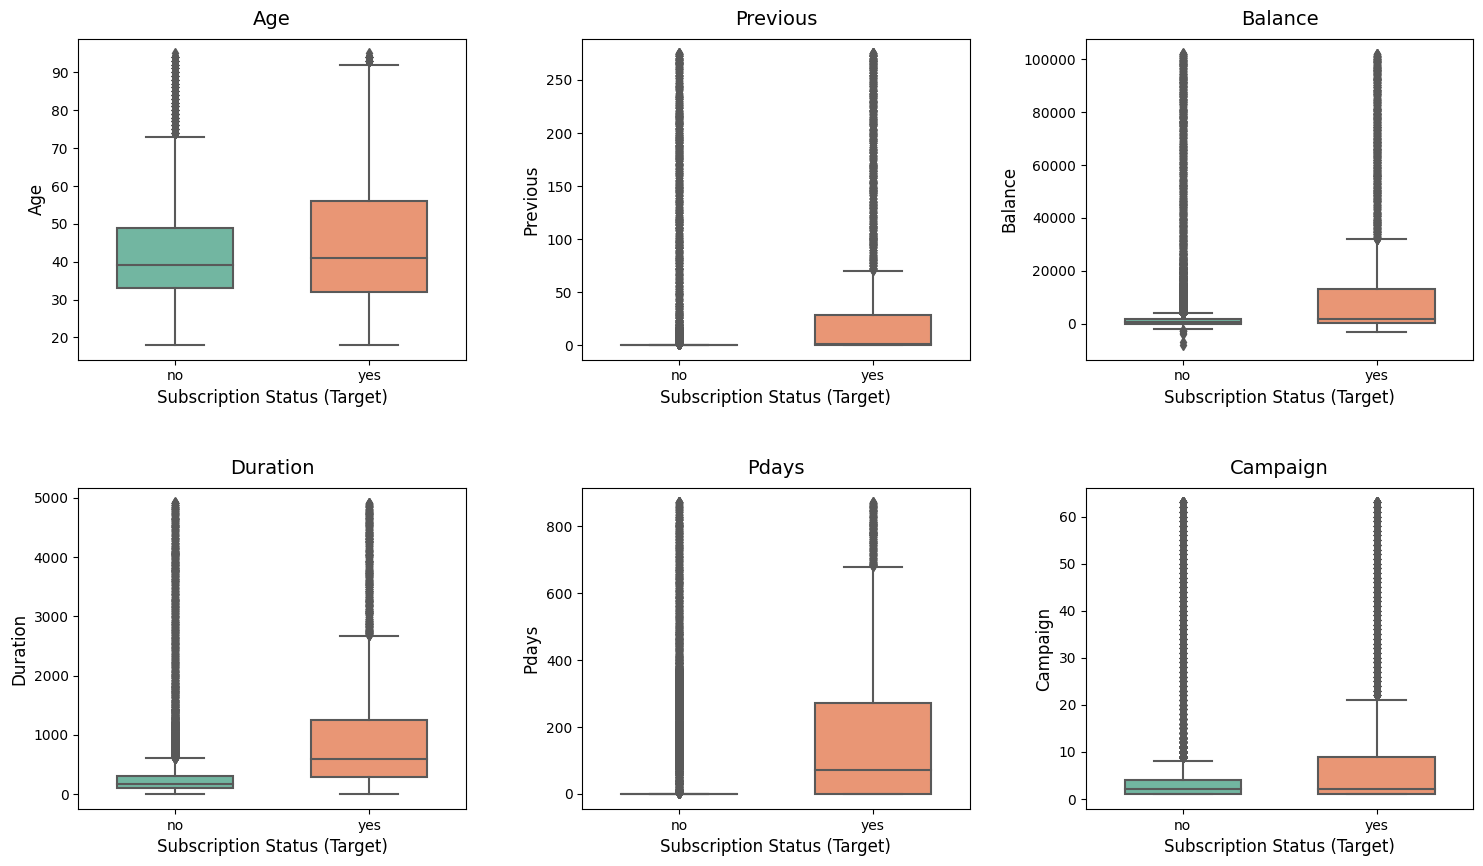

In [103]:
columns = ['age', 'previous', 'balance', 'duration', 'pdays', 'campaign']
titles = ['Age', 'Previous', 'Balance', 'Duration', 'Pdays', 'Campaign']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (col, title) in enumerate(zip(columns, titles)):
    r, c = divmod(i, 3)  
    sns.boxplot(
        data=train, x='target', y=col, ax=axes[r, c], 
        palette='Set2', width=0.6
    )
    axes[r, c].set_title(title, fontsize=14, pad=10)
    axes[r, c].set_xlabel('Subscription Status (Target)', fontsize=12)
    axes[r, c].set_ylabel(title, fontsize=12)
    axes[r, c].tick_params(axis='x', rotation=0)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

### Insights

* **Previous**: Very high values (>50) stand out, especially for non-subscribers.
* **Balance**: Extreme values above 40,000-50,000 for both groups. Subscribed clients have a slightly higher median balance, but there’s significant overlap.
* **Duration**: Extremely long call durations (>3,000 seconds) for some clients. Clients who subscribed (yes) generally had longer call durations. This feature is likely a strong predictor.
* **Pdays**: Values close to 800 are outliers for both groups.
* **Campaign**: Several instances with contacts >30 are clear outliers. The number of contacts is similar for both groups, suggesting limited predictive power.
* **Previous and Pdays**: These show higher values for subscribers, indicating more previous engagements.
* **Age**: Slightly higher median age for subscribers, though the overlap i large.


## Correlation Matrix

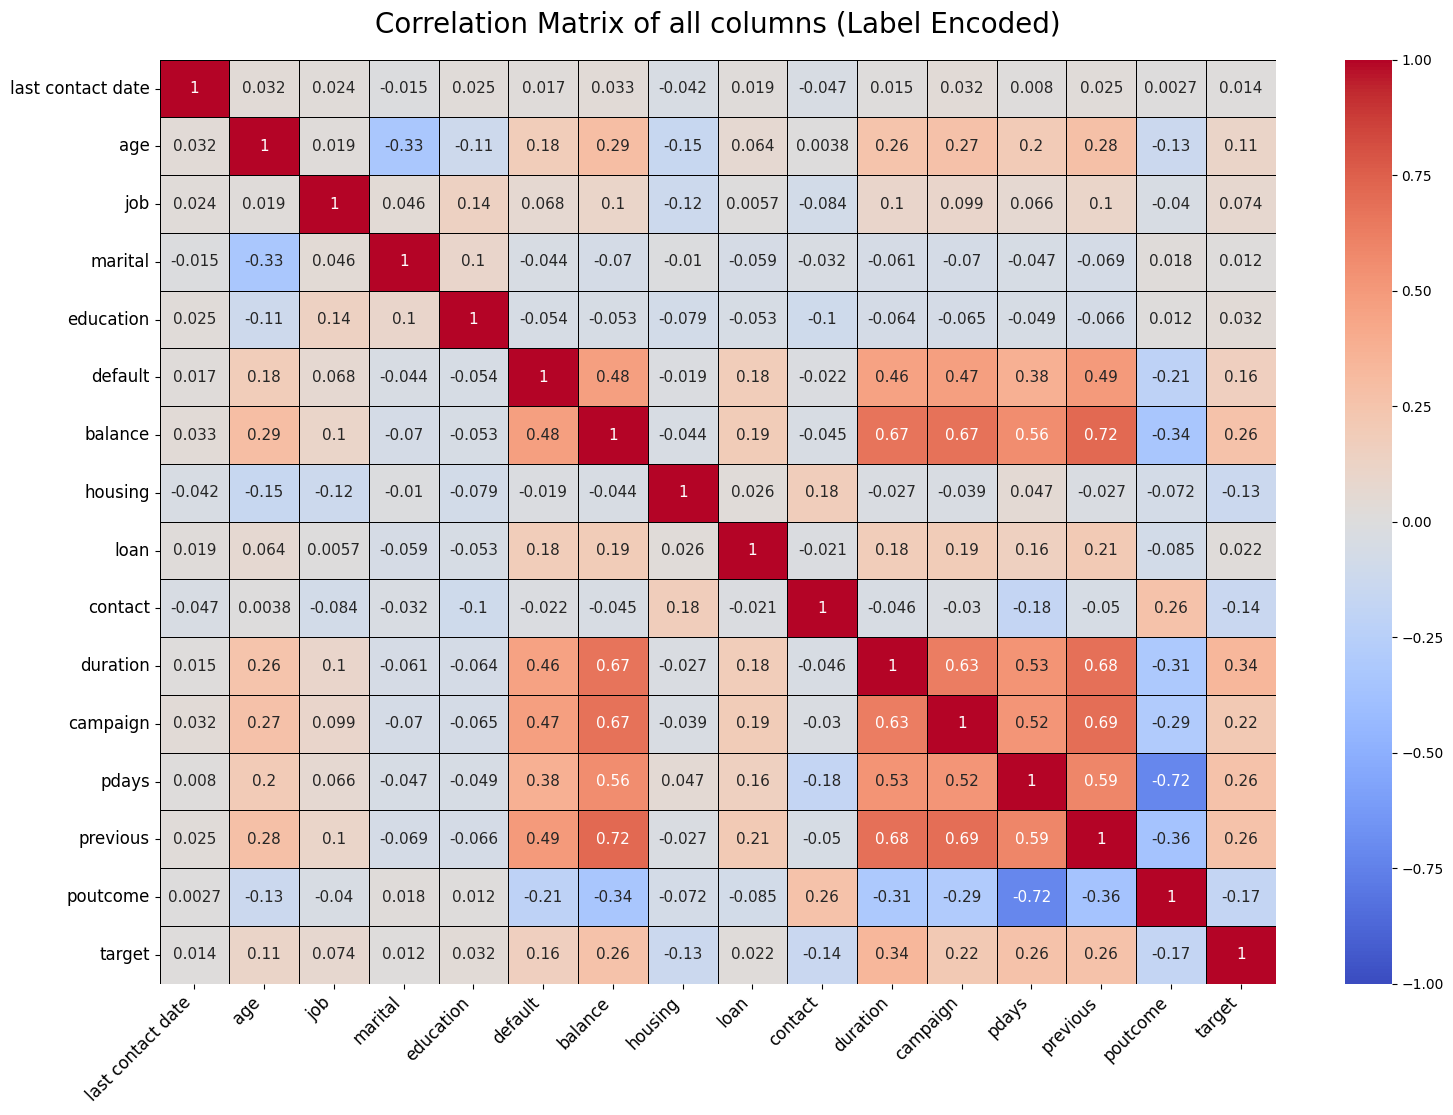

In [104]:
data_copy = train.copy()
cat_cols = data_copy.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_cols:
    data_copy[col] = encoder.fit_transform(data_copy[col])

corr_matrix = data_copy.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1, linewidths=0.5,linecolor='black', annot_kws={"size": 11}, )
plt.title('Correlation Matrix of all columns (Label Encoded)', fontsize=20, pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.show()

## Subscription Status in Categorical Columns

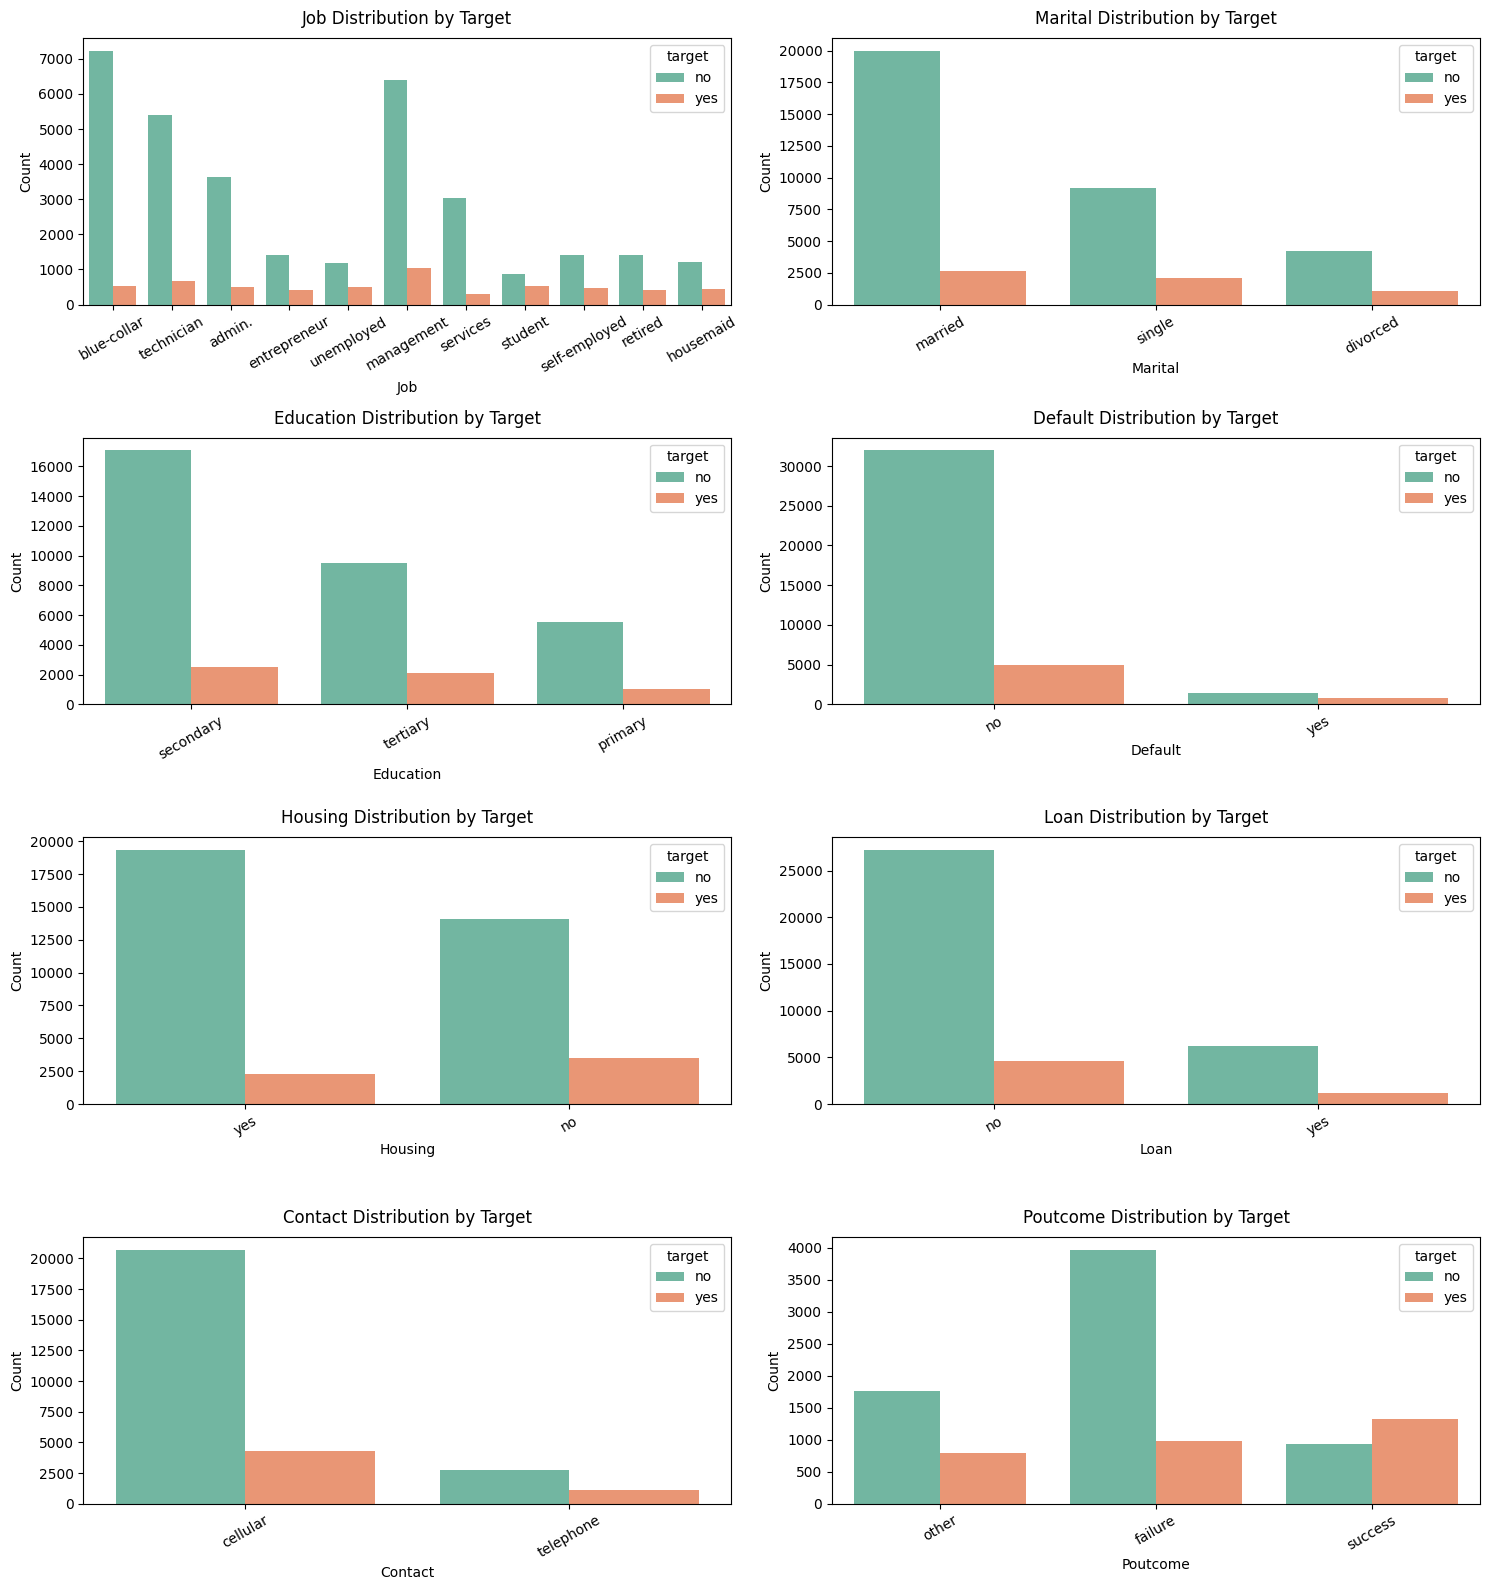

In [105]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
n_cols = 2
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=train, x=col, hue='target', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Distribution by Target', fontsize=12, pad=10)
    axes[i].set_xlabel(col.capitalize(), fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### Insights
1. Job: Students are more likely to accept, while other job types, especially management and blue-collar, are more likely to decline.
2. Marital: married individuals are more likely to decline the bank's term deposit subscription.
3. Education: Secondary education has the highest count, with tertiary education showing a better "yes" proportion.
4. Default: People with no default are more likely to subscribe, while those with a default are less likely to.
5. No housing and no loan clients are slightly more likely to decline the offer, while those with housing loans or personal loans tend to decline more.
7. Contact: Cellular contact leads to more declines, while telephone contact shows a higher likelihood of acceptance.
8. Poutcome: Success from previous campaigns leads to a higher likelihood of accepting, while past failures lead to a higher likelihood of declining.

## Time Series Analysis

In [106]:
# Converting to datetime
train['last_contact_date'] = pd.to_datetime(train['last contact date'])

# Extracting year, month, and weekday from the date column
train['year'] = train['last_contact_date'].dt.year
train['month'] = train['last_contact_date'].dt.month
train['weekday'] = train['last_contact_date'].dt.day_name()

# minimum and maximum dates
min_date = train['last_contact_date'].min()
max_date = train['last_contact_date'].max()

# value counts for unique dates
date_counts = train['last_contact_date'].value_counts().sort_index()
print(f"Date range: {min_date} to {max_date}")
print(f"Unique dates: {len(date_counts)}")

Date range: 2008-01-01 00:00:00 to 2010-12-30 00:00:00
Unique dates: 1013


### Clustered bar charts for weekday. monthly and yearly trend analysis

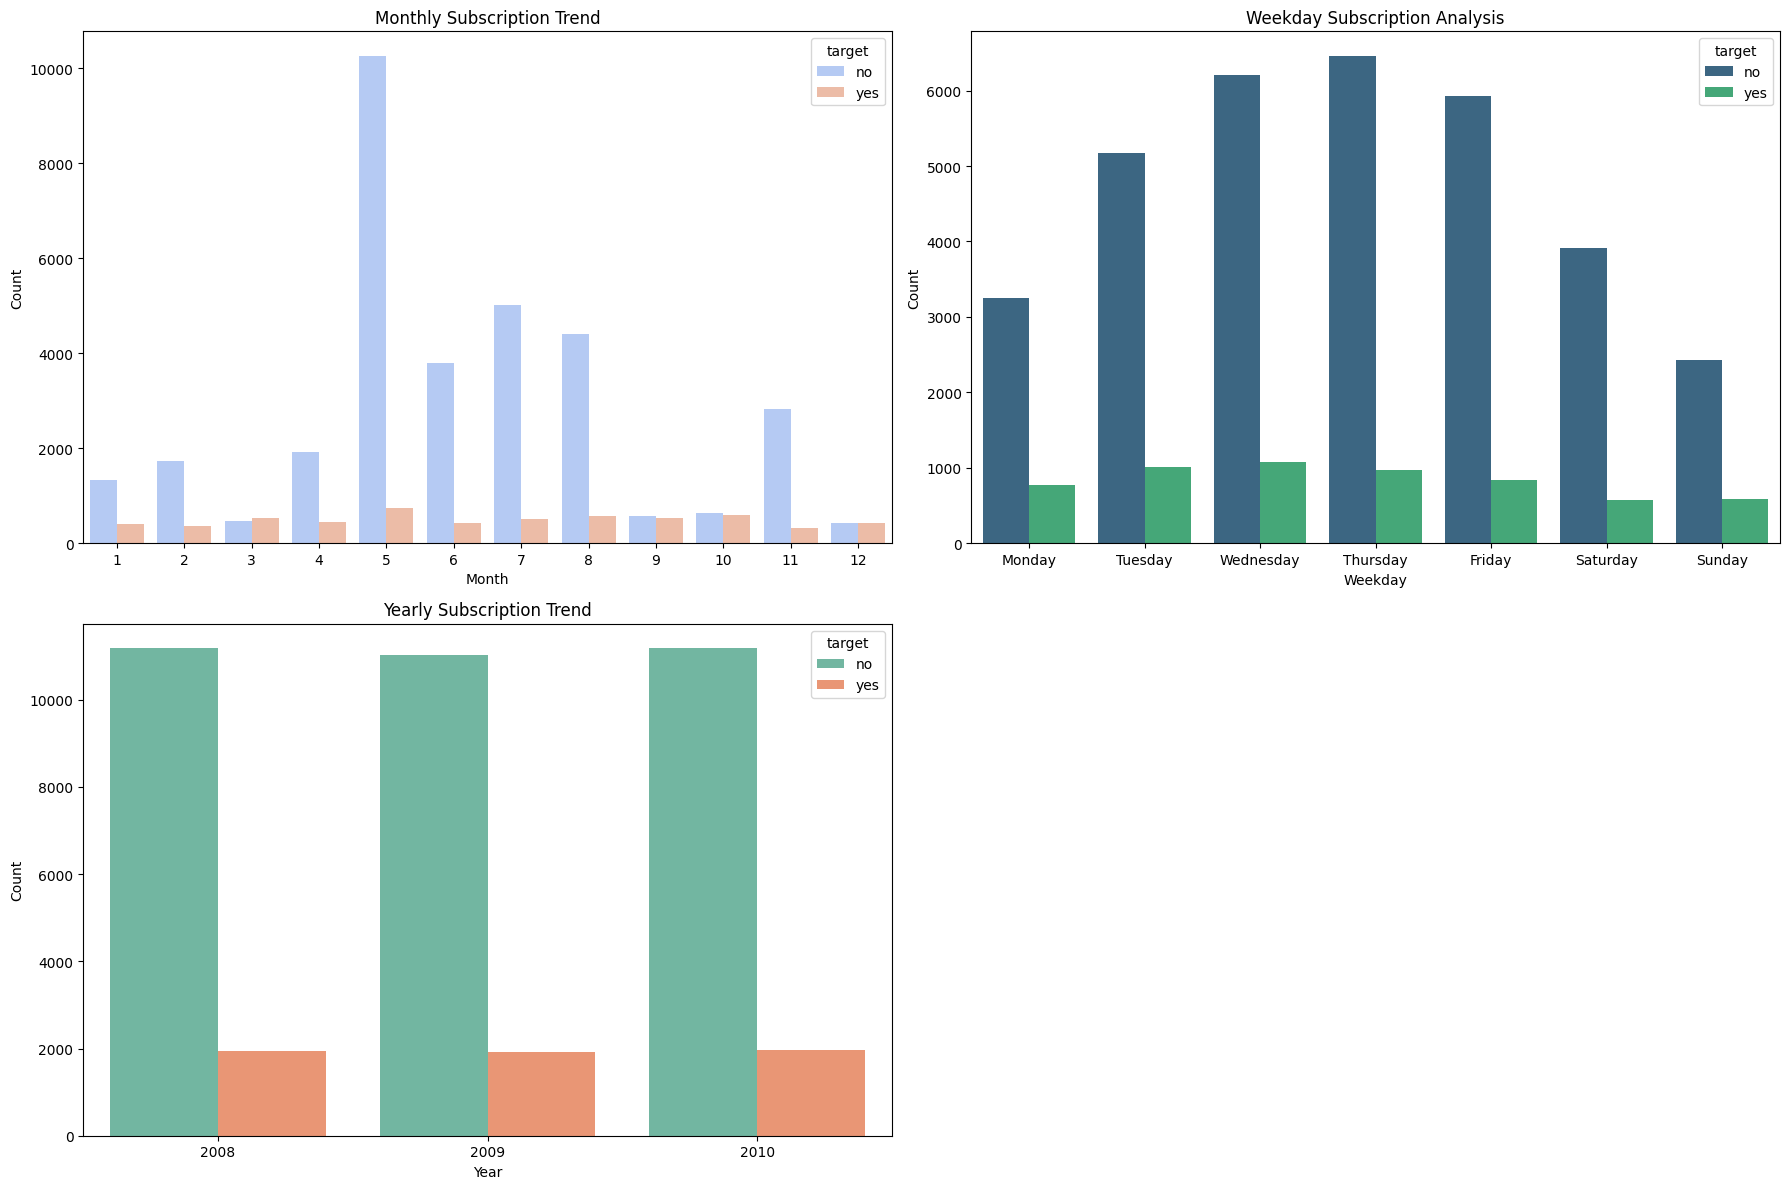

In [107]:
# Visualizations
plt.figure(figsize=(18, 12))

# Monthly Subscription Trend
plt.subplot(2, 2, 1)
sns.countplot(data=train, x='month', hue='target', palette='coolwarm')
plt.title('Monthly Subscription Trend')
plt.xlabel('Month')
plt.ylabel('Count')

# Weekday Subscription Analysis
plt.subplot(2, 2, 2)
sns.countplot(data=train, x='weekday', hue='target', palette='viridis', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday Subscription Analysis')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Yearly Subscription Trend
plt.subplot(2, 2, 3)
sns.countplot(data=train, x='year', hue='target', palette='Set2')
plt.title('Yearly Subscription Trend')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Insights
1. May (Month 5) has the highest campaign activity.
2. March (3), September (9), and December (12) show better "yes" proportions, indicating effective campaigns or seasonal trends.
3. Campaign performance varies significantly across months, with certain months (e.g., May, July) being more focused on outreach.
4. Sunday has the lowest total activity but a relatively higher "yes" proportion, indicating better campaign success on weekends.
5. Campaigns seem most effective midweek (Tuesday to Thursday).
6. Overall, campaign performance remained steady over the years.

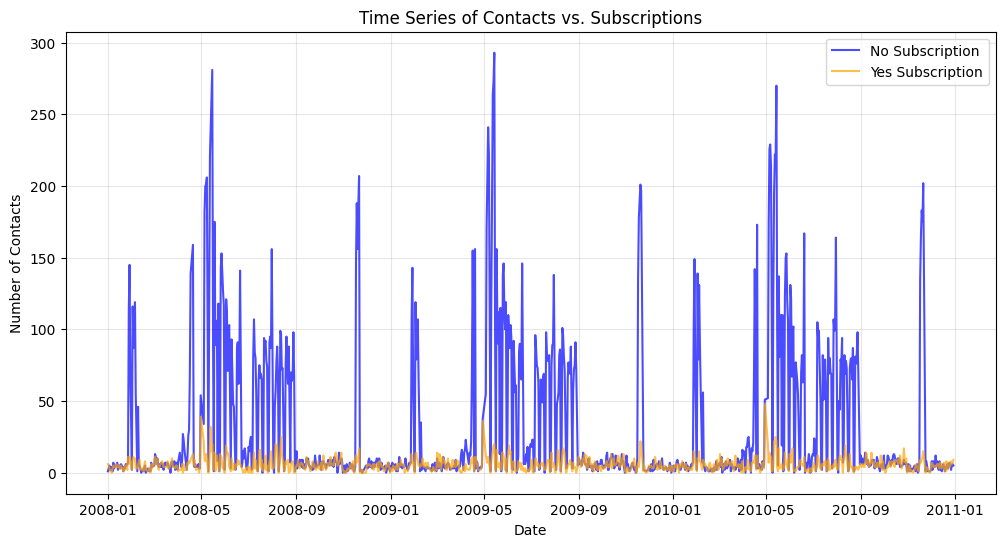

In [108]:
time_series_data = train.groupby('last_contact_date')['target'].value_counts().unstack()

# Filling missing values with 0 
time_series_data = time_series_data.fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['no'], label='No Subscription', color='blue', alpha=0.7)
plt.plot(time_series_data.index, time_series_data['yes'], label='Yes Subscription', color='orange', alpha=0.7)
plt.title("Time Series of Contacts vs. Subscriptions")
plt.xlabel("Date")
plt.ylabel("Number of Contacts")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# **Preprocessing**
The last contact date column was initially used to extract temporal features such as year, month, and weekday, which have been visualized to understand patterns in the data. Since these derived features capture the temporal information contained in the last contact date column, the original column is now redundant. Keeping it could introduce multicollinearity into the dataset, which may negatively impact model performance. Therefore, it is being removed from both the training and test datasets to ensure clean and efficient data for modeling.

In [109]:
train.drop(columns=['last contact date','year', 'month', 'weekday','last_contact_date'],inplace=True)
test.drop(columns=['last contact date'],inplace=True)

In [110]:
# Splitting features and target variable
X = train.drop(columns=['target'])
y = train['target']

# Label Encoding Target Column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Train-Validation Split (80/20 split)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Checking the shape of the splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (31368, 14)
X_val shape: (7843, 14)
y_train shape: (31368,)
y_val shape: (7843,)


In [112]:
#Preprocessing

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying numerical and categorical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
ordinal_categorical = ['education']
nominal_categorical = ['default', 'housing', 'loan', 'job', 'marital', 'contact', 'poutcome']

# Creating Pipelines
# Preprocessing for numerical columns (Imputation + Scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Preprocessing for ordinal & nominal categorical columns (Imputation + Encoding)
ordinal_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]))
])

nominal_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combining preprocessing steps for both numerical and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numerical_columns),
    ('ordinal', ordinal_cat_transformer, ordinal_categorical),
    ('nominal', nominal_cat_transformer, nominal_categorical)],remainder='passthrough')

# Fitting and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# **Model Training**

## Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_preprocessed, y_train)
y_pred = logreg_model.predict(X_val_preprocessed)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, y_pred, target_names=['No', 'Yes']))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.97      0.92      6677
         Yes       0.58      0.23      0.33      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843



## Principal Component Analysis (PCA) with Logistic Regression

In [114]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=10) 

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# pipeline for PCA and model
pipeline = Pipeline([
    ('pca', pca),
    ('model', log_reg)
])

pipeline.fit(X_train_preprocessed, y_train)

print("\nTraining Set Results:")
y_pred_train = pipeline.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train))

print("\nTest Set Results:")
y_pred_test = pipeline.predict(X_val_preprocessed)
print(classification_report(y_val, y_pred_test))


Training Set Results:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     26707
           1       0.50      0.14      0.22      4661

    accuracy                           0.85     31368
   macro avg       0.68      0.56      0.57     31368
weighted avg       0.81      0.85      0.81     31368


Test Set Results:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6677
           1       0.54      0.16      0.24      1166

    accuracy                           0.85      7843
   macro avg       0.70      0.57      0.58      7843
weighted avg       0.82      0.85      0.82      7843



* No improvement in score, dataset's original features were already well-suited for the model, and dimensionality reduction removed some of the meaningful information.

## K-Nearest Neighbors

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_preprocessed, y_train)
y_pred_knn = knn_model.predict(X_val_preprocessed)

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_val, y_pred_knn, target_names=['No', 'Yes']))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.95      0.92      6677
         Yes       0.53      0.33      0.40      1166

    accuracy                           0.86      7843
   macro avg       0.71      0.64      0.66      7843
weighted avg       0.84      0.86      0.84      7843



## Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_preprocessed, y_train)
y_pred_nb = nb_model.predict(X_val_preprocessed)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_val, y_pred_nb, target_names=['No', 'Yes']))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.90      0.90      6677
         Yes       0.44      0.46      0.45      1166

    accuracy                           0.83      7843
   macro avg       0.67      0.68      0.68      7843
weighted avg       0.84      0.83      0.83      7843



## RandomForestClassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_preprocessed, y_train)
y_pred = rf_model.predict(X_val_preprocessed)

print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_val, y_pred, target_names=['No', 'Yes']))


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.95      0.92      6677
         Yes       0.57      0.36      0.44      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.66      0.68      7843
weighted avg       0.85      0.86      0.85      7843



## SGDClassifier (Linear SVM)

In [118]:
from sklearn.linear_model import SGDClassifier

sgd_svm = SGDClassifier(loss='hinge', random_state=0)
sgd_svm.fit(X_train_preprocessed, y_train)
y_pred_sgd_svm = sgd_svm.predict(X_val_preprocessed)

print("\nSGDClassifier (Linear SVM) Classification Report:")
print(classification_report(y_val, y_pred_sgd_svm, target_names=['No', 'Yes']))


SGDClassifier (Linear SVM) Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.97      0.92      6677
         Yes       0.57      0.22      0.32      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843



## Gradient Boosting

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train_preprocessed, y_train)
y_pred_gb = gb_model.predict(X_val_preprocessed)

print("\nGradient Boosting Classification Report:")
print(classification_report(y_val, y_pred_gb, target_names=['No', 'Yes']))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.95      0.93      6677
         Yes       0.59      0.40      0.48      1166

    accuracy                           0.87      7843
   macro avg       0.74      0.68      0.70      7843
weighted avg       0.85      0.87      0.86      7843



## XGBoost

In [120]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_model.fit(X_train_preprocessed, y_train)
y_pred_xgb = xgb_model.predict(X_val_preprocessed)

print("\nXGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb, target_names=['No', 'Yes']))


XGBoost Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.95      0.93      6677
         Yes       0.58      0.44      0.50      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.69      0.71      7843
weighted avg       0.86      0.87      0.86      7843



## LightGBM

In [121]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=0)
lgbm_model.fit(X_train_preprocessed, y_train)
y_pred_lgbm = lgbm_model.predict(X_val_preprocessed)

print("\nLightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgbm, target_names=['No', 'Yes']))

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1211
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696

LightGBM Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.95      0.93      6677
         Yes       0.59      0.42      0.49      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.68      0.71      7843
weighted avg       0.86      0.87      0.86      7843



## Model Training Summary

| Model                        | Precision (No) | Recall (No) | F1-Score (No) | Precision (Yes) | Recall (Yes) | F1-Score (Yes) | Accuracy | Macro Avg F1 | Weighted Avg F1 |
|------------------------------|----------------|-------------|---------------|-----------------|--------------|----------------|----------|--------------|-----------------|
| Logistic Regression          | 0.88           | 0.97        | 0.92          | 0.58            | 0.23         | 0.33           | 0.86     | 0.62         | 0.83            |
| K-Nearest Neighbors          | 0.89           | 0.95        | 0.92          | 0.53            | 0.33         | 0.40           | 0.86     | 0.66         | 0.84            |
| Naive Bayes                  | 0.91           | 0.90        | 0.90          | 0.44            | 0.46         | 0.45           | 0.83     | 0.68         | 0.83            |
| Random Forest                | 0.89           | 0.95        | 0.92          | 0.57            | 0.36         | 0.44           | 0.86     | 0.68         | 0.85            |
| SGDClassifier (Linear SVM)   | 0.88           | 0.97        | 0.92          | 0.57            | 0.22         | 0.32           | 0.86     | 0.62         | 0.83            |
| Gradient Boosting            | 0.90           | 0.95        | 0.93          | 0.59            | 0.40         | 0.48           | 0.87     | 0.70         | 0.86            |
| XGBoost                      | 0.91           | 0.95        | 0.93          | 0.58            | 0.44         | 0.50           | 0.87     | 0.71         | 0.86            |
| LightGBM                     | 0.90           | 0.95        | 0.93          | 0.59            | 0.42         | 0.49           | 0.87     | 0.71         | 0.86            |


### Insights from Model Training Summary

1. **Best Overall Accuracy**:
   - Models like **Gradient Boosting**, **XGBoost**, and **LightGBM** achieve the highest accuracy of **87%**, showcasing their effectiveness.

2. **Class Imbalance Challenge**:
   - The `Yes` class consistently has lower precision, recall, and F1-scores across all models, highlighting the difficulty in predicting minority class subscriptions.

3. **Naive Bayes Performance**:
   - **Naive Bayes** struggles with the minority class, achieving a low F1-score of **0.45** for `Yes`, despite decent overall accuracy (**83%**).

4. **High F1-Score for 'No'**:
   - All models perform exceptionally well for the `No` class, with F1-scores consistently above **0.90**, reflecting the majority class's dominance.

5. **Best Minority Class Handling**:
   - **XGBoost** leads for the `Yes` class with the highest F1-score of **0.50**, followed closely by **LightGBM** (**0.49**) and **Gradient Boosting** (**0.48**).

6. **Linear Models Struggle**:
   - Models like **Logistic Regression** and **SGDClassifier** have lower recall and F1-scores for the `Yes` class, indicating weaker performance in identifyperparameter tuning.


# **HyperParameter Tuning**
* We will perform HyperParameter Tuning on LightGBM and XGBoost, as they both were the best performing models among others.

We have commented the code to make the notebook run faster and be clean (as output for these model take very large space). The code should be uncommented to run the model.

## Tuned LightGBM

In [123]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],     # No. of boosting iterations/trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       
    'max_depth': [-1, 3, 5, 7, 9],                 # Maximum depth of a tree (-1 means no limit)
    'num_leaves': [15, 31, 50, 70],                # Maximum number of leaves per tree
    'min_child_samples': [10, 20, 30, 50],        
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],        
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 
    'reg_alpha': [0, 0.1, 0.5, 1.0],               # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0],              # L2 regularization
    'scale_pos_weight': [1, 2, 5, 10]            
}

lgbm_model = LGBMClassifier(random_state=0)

random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_distributions,
    n_iter=50,           
    scoring='f1_macro',       
    cv=3,                      
    verbose=2,
    random_state=42,
    n_jobs=-1                 
)

# Fitting RandomizedSearchCV on preprocessed training data
random_search.fit(X_train_preprocessed, y_train)

#Printing best parameters and score
print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

print("\nBest Score from RandomizedSearchCV:")
print(random_search.best_score_)


Best Parameters from RandomizedSearchCV:
{'subsample': 1.0, 'scale_pos_weight': 2, 'reg_lambda': 0.1, 'reg_alpha': 0, 'num_leaves': 50, 'n_estimators': 100, 'min_child_samples': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

Best Score from RandomizedSearchCV:
0.7599330090583581



Classification Report for Tuned LGBMClassifier:
              precision    recall  f1-score   support

          No       0.94      0.89      0.92      6677
         Yes       0.53      0.70      0.60      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.80      0.76      7843
weighted avg       0.88      0.86      0.87      7843



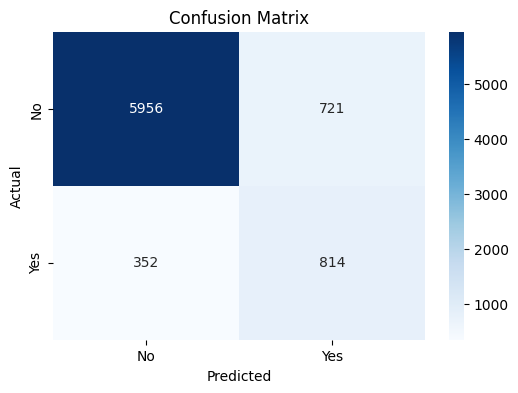

In [125]:
final_lgbm_model = LGBMClassifier(
    random_state=0,
    subsample=1.0,
    scale_pos_weight=2,
    reg_lambda=1,
    reg_alpha=1.0,
    num_leaves=50,
    n_estimators=200,
    min_child_samples=20,
    max_depth=5,
    learning_rate=0.05,
    colsample_bytree=1.0,
    early_stopping_rounds=20
)

final_lgbm_model.fit(X_train_preprocessed, y_train, eval_set=[(X_val_preprocessed, y_val)])

test_probabilities = final_lgbm_model.predict_proba(X_val_preprocessed)[:, 1]
y_pred_lgbm = (test_probabilities >= 0.5).astype(int)

print("\nClassification Report for Tuned LGBMClassifier:")
print(classification_report(y_val, y_pred_lgbm, target_names=['No', 'Yes']))

# confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_lgbm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Tuned XGBoost

In [127]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Defining the hyperparameter distribution for XGBoost
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],        # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Step size shrinkage
    'max_depth': [3, 5, 7, 9],                       # Maximum tree depth
    'min_child_weight': [1, 3, 5, 7],                # Minimum sum of instance weight
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],          # Fraction of samples for training
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],   # Fraction of features used per tree
    'gamma': [0, 0.1, 0.3, 0.5],                     # Minimum loss reduction
    'reg_alpha': [0, 0.1, 0.5, 1.0],                 # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0],                # L2 regularization
    'scale_pos_weight': [1, 2, 3, 5, 10]             # Handle class imbalance
}

# Initializing XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='auc')

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,              # Number of random combinations to try
    scoring='f1_macro',     # Metric to optimize
    cv=3,                   # 3-fold cross-validation
    verbose=2,              # Print progress
    random_state=42,        # For reproducibility
    n_jobs=-1               # Use all available processors
)

# Fitting RandomizedSearchCV on preprocessed training data
random_search.fit(X_train_preprocessed, y_train)

# best parameters and score
print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

print("\nBest Score from RandomizedSearchCV:")
print(random_search.best_score_)


Best Parameters from RandomizedSearchCV:
{'subsample': 0.6, 'scale_pos_weight': 3, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}

Best Score from RandomizedSearchCV:
0.7613684394367736


In [128]:
model = XGBClassifier(
    random_state=42,               # Ensures reproducibility of results
    scale_pos_weight=3,            # Balances class imbalance by weighting the minority class more heavily
    colsample_bytree=0.7,          # Fraction of features (columns) to consider for each tree to prevent overfitting
    learning_rate=0.03,            # Step size shrinkage to control the impact of each tree (lower values make learning slower and more precise)
    max_depth=5,                   # Maximum depth of each tree; deeper trees can overfit, so a moderate value is chosen
    n_estimators=300,              # Number of boosting rounds (trees); higher value compensates for low learning rate
    subsample=0.6,                 # Fraction of training data (rows) to sample for each boosting round to avoid overfitting
    min_child_weight=7,            # Minimum sum of instance weights needed in a child node; avoids overly complex splits
    gamma=0.1,                     # Minimum loss reduction required to make a split; higher values prevent unnecessary splits
    reg_alpha=0.5,                 # L1 regularization term to control model complexity and prevent overfitting
    reg_lambda=0.1,                  # L2 regularization term to further control model complexity
    objective='binary:logistic',   # Binary classification task with logistic regression output
    eval_metric='auc',             # Evaluation metric: Area Under the ROC Curve (AUC) for better assessment of imbalanced data
    early_stopping_rounds=20       # Stops training early if validation performance doesn't improve for 20 rounds    
)

# Training with eval set
model.fit(X_train_preprocessed, y_train, eval_set=[(X_val_preprocessed, y_val)], verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Classification Report for tuned XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      6677
           1       0.50      0.76      0.60      1166

    accuracy                           0.85      7843
   macro avg       0.73      0.81      0.75      7843
weighted avg       0.89      0.85      0.86      7843



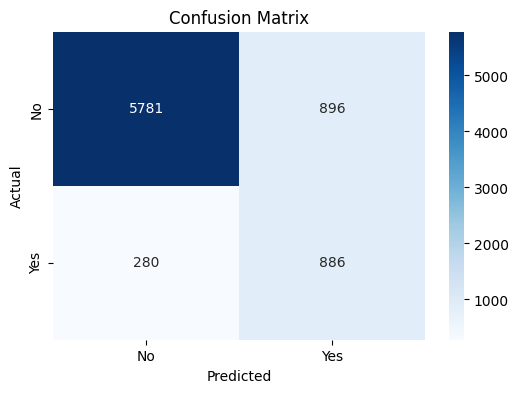

In [129]:
# Printing results
y_pred_test = model.predict(X_val_preprocessed)
print("\nClassification Report for tuned XGBoost Classifier:")
print(classification_report(y_val, y_pred_test))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_test)

# plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Insights from Hyperparameter Tuned Models

1. **Improved Minority Class Performance**:
   - Both **Tuned LGBMClassifier** and **Tuned XGBoost** show significant improvement for the `Yes` class, with F1-scores of **0.60** and **0.61**, respectively, compared to the untuned models.

2. **High Precision and Recall for 'No'**:
   - Both models maintain high precision (around **0.94**) and recall (~**0.90**) for the `No` class, ensuring strong performance on the majority class.

3. **Balanced Accuracy**:
   - **Tuned XGBoost** achieves an accuracy of **87%**, slightly outperforming the **Tuned LGBMClassifier** at **86%**, but both models perform well overall.

4. **Macro Average Improvements**:
   - The macro average F1-score for both models is around **0.76**, showing a balanced performboth across bjority class.


# **Final Submission**
* We have selected **XGBoost** as our final model

In [130]:
# Transforming test data
X_train_final = preprocessor.fit_transform(X)
X_val_final = preprocessor.transform(test)

In [131]:
final_model = XGBClassifier(
    random_state=42,             
    scale_pos_weight=3.1,            
    colsample_bytree=0.8,          
    learning_rate=0.03,          
    max_depth=6,                  
    n_estimators=400,              
    subsample=0.8,                
    min_child_weight=3,            
    gamma=0.1,                     
    reg_alpha=0.1,               
    reg_lambda=1,                
    objective='binary:logistic',  
    eval_metric='auc',             
    early_stopping_rounds=20       
)
final_model.fit(X_train_final, y, eval_set=[(X_val_preprocessed, y_val)], verbose=0)

y_val_pred = final_model.predict_proba(X_val_final)[:, 1]
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)

### Submission

In [132]:
submission = pd.DataFrame({"id": range(0,X_val_final.shape[0]), 

                           "target": label_encoder.inverse_transform(y_val_pred_binary)})
submission.to_csv('submission.csv', index = False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.
